In [1]:
%matplotlib inline

In [ ]:
# this is for skimage version 16 
#
# https://scikit-image.org/docs/dev/auto_examples/edges/plot_marching_cubes.html


# Marching Cubes


Marching cubes is an algorithm to extract a 2D surface mesh from a 3D volume.
This can be conceptualized as a 3D generalization of isolines on topographical
or weather maps. It works by iterating across the volume, looking for regions
which cross the level of interest. If such regions are found, triangulations
are generated and added to an output mesh. The final result is a set of
vertices and a set of triangular faces.

The algorithm requires a data volume and an isosurface value. For example, in
CT imaging Hounsfield units of +700 to +3000 represent bone. So, one potential
input would be a reconstructed CT set of data and the value +700, to extract
a mesh for regions of bone or bone-like density.

This implementation also works correctly on anisotropic datasets, where the
voxel spacing is not equal for every spatial dimension, through use of the
`spacing` kwarg.


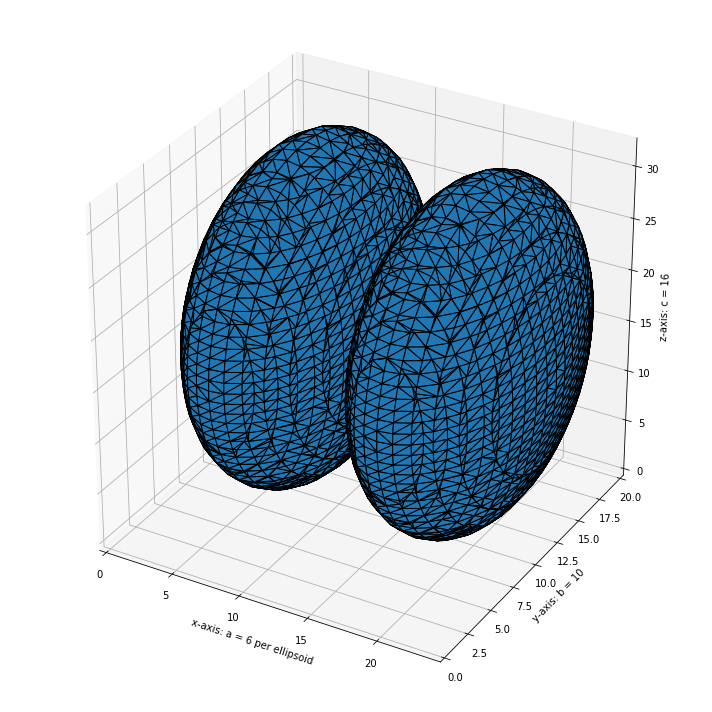

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid


# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes_lewiner(ellip_double, 0) # version 16 uses marching_cube_lewiner

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes_lewiner docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()